<a href="https://colab.research.google.com/github/maskot1977/ComputerExercises2022/blob/21cI22NJS24tda4B/11%E6%9C%881%E6%97%A5%E8%AC%9B%E7%BE%A9%E5%88%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第２９章

In [ ]:
import urllib.request
url = 'https://raw.githubusercontent.com/maskot1977/toydata/main/data/infection_test.txt'
urllib.request.urlretrieve(url, 'infection_test.txt') # データのダウンロード

('infection_test.txt', <http.client.HTTPMessage at 0x7f63909bc6d0>)

In [ ]:
infected = []
not_infected = []
for i, line in enumerate(open('infection_test.txt')):
    if i > 0:
        c = line.split(",")
        if c[1][0] == "I":
            infected.append(float(c[0]))
        else:
            not_infected.append(float(c[0]))

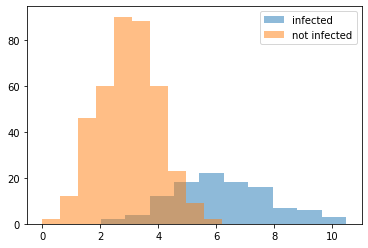

In [ ]:
import matplotlib.pyplot as plt
plt.hist(infected, alpha=0.5, label="infected")
plt.hist(not_infected, alpha=0.5, label="not infected")
plt.legend()
plt.show()

In [ ]:
T = []
ACC = []
Precision = []
Recall = []
F1 = []
Specificity = []
for x in range(0, 51):
    t = x / 5
    T.append(t)
    TP, FN, FP, TN = 0, 0, 0, 0
    for y in infected:
        if y >= t:
            TP += 1
        else:
            FN += 1
    for y in not_infected:
        if y >= t:
            FP += 1
        else:
            TN += 1
    ACC.append((TP+TN) / (FP+FN+FP+TN))
    p = TP/(TP+FP)
    Precision.append(p)
    r = TP/(TP+FN)
    Recall.append(r)
    F1.append(2 * r * p / (p + r))
    Specificity.append(FP/(FP+TN))

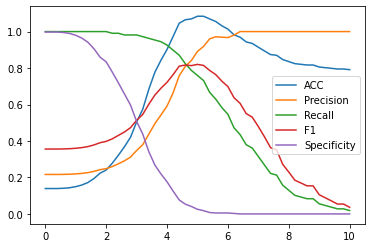

In [ ]:
plt.plot(T, ACC, label="ACC")
plt.plot(T, Precision, label="Precision")
plt.plot(T, Recall, label="Recall")
plt.plot(T, F1, label="F1")
plt.plot(T, Specificity, label="Specificity")
plt.legend()
plt.show()

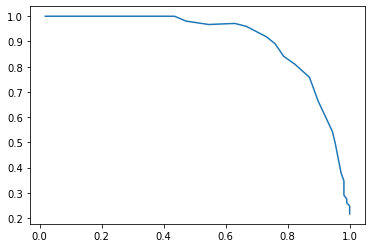

In [ ]:
plt.plot(Recall, Precision)

# 第３０章

In [ ]:
def chapter30(n_infected, acc=0.95):
    TP = n_infected * acc / (n_infected * acc + (1-n_infected)*(1-acc))
    FN = n_infected * (1-acc) / (n_infected*(1-acc) +(1-n_infected)*acc)
    return TP, FN

In [ ]:
chapter30(0.5)

(0.95, 0.050000000000000044)

In [ ]:
chapter30(0.1)

(0.6785714285714284, 0.005813953488372098)

In [ ]:
chapter30(0.01)

(0.16101694915254225, 0.0005313496280552608)

# 第３１章

In [ ]:
X = [0, 1, 2, 3, 4]
Y = [5, 6, 7, 8, 9]

for x in X:
    for y in Y:
        print(x, y)

0 5
0 6
0 7
0 8
0 9
1 5
1 6
1 7
1 8
1 9
2 5
2 6
2 7
2 8
2 9
3 5
3 6
3 7
3 8
3 9
4 5
4 6
4 7
4 8
4 9


In [ ]:
X = [0, 1, 2, 3, 4]
Y = [5, 6, 7, 8, 9]

for x, y in zip(X, Y):
    print(x, y)

0 5
1 6
2 7
3 8
4 9


In [ ]:
def chap31(m, k):
    for k1 in k:
        for k2 in k:
            for k3 in k:
                for k4 in k:
                    if k1 + k2 + k3 + k4 == m:
                        return True
    return False

In [ ]:
n = 10
m =  36
k =  [13, 39, 63, 70, 18, 87, 46, 99, 68, 47]

In [ ]:
chap31(m, k)

False

In [ ]:
n = 10
m =  66
k =  [60, 45, 73, 100, 57, 82, 2, 85, 43, 8]

In [ ]:
chap31(m, k)

True

In [ ]:
def chap31_better(m, k):
    for k1 in k:
        for k2 in k:
            if k1 + k2 > m:
                continue
            for k3 in k:
                if k1 + k2 + k3 > m:
                    continue
                for k4 in k:
                    if k1 + k2 + k3 + k4 == m:
                        return True
    return False

In [ ]:
%%timeit
n = 10
m =  66
k =  [60, 45, 73, 100, 57, 82, 2, 85, 43, 8]
chap31_better(m, k)

1.64 µs ± 9.36 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit
n = 10
m =  66
k =  [60, 45, 73, 100, 57, 82, 2, 85, 43, 8]
chap31(m, k)

55.1 µs ± 1.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# 課題32

In [ ]:
def chap32(a):
    a.sort()
    max_ = 0
    for x1 in range(len(a)):
        for x2 in range(len(a)):
            if x2 <= x1:
                continue
            for x3 in range(len(a)):
                if x3 <= x1 or x3 <= x2:
                    continue
                if a[x3] < a[x1] + a[x2]:
                    if max_ < a[x3] + a[x1] + a[x2]:
                        max_ = a[x3] + a[x1] + a[x2]
    return max_

In [ ]:
n =  5
a =  [28.54, 13.36, 54.82, 13.91, 44.29]
chap32(a)

127.65

In [ ]:
n =  4
a =  [24.73, 53.4, 0.25, 97.89]
chap32(a)

0

In [ ]:
n =  19
a =  [493.13, 615.02, 340.68, 462.98, 988.55, 572.16, 572.91, 963.01, 12.07, 95.51, 733.24, 810.39, 105.99, 574.57, 945.38, 937.82, 976.24, 245.43, 260.06]
chap32(a)

2927.8

# 第３３章

In [ ]:
def chap33(x):
    V = [500, 100, 50, 10, 5, 1]
    C = [10, 10, 10, 10, 10, 10]
    nanmai = 0
    for v, c in zip(V, C):
        maisu = min(int(x/v), c)
        if maisu < 0:
            return False
        nanmai += maisu
        x -= v * maisu
        print(v, maisu, x)
    if x > 0:
        return False
    return nanmai

In [ ]:
x =  1672
chap33(x)

500 3 172
100 1 72
50 1 22
10 2 2
5 0 2
1 2 0


9

In [ ]:
x =  5549
chap33(x)

500 10 549
100 5 49
50 0 49
10 4 9
5 1 4
1 4 0


24

In [ ]:
x =  3067
chap33(x)

500 6 67
100 0 67
50 1 17
10 1 7
5 1 2
1 2 0


11

In [ ]:
x = 8802
chap33(x)

500 10 3802
100 10 2802
50 10 2302
10 10 2202
5 10 2152
1 10 2142


False

In [ ]:
x =  -124
chap33(x)

500 0 -124


False

# 第３４章

In [ ]:
def chap34(n):
    result = []
    for i in range(2, n):
        if n%i == 0:
            result.append(i)
    return result

In [ ]:
%%timeit
n = 8075
chap34(n)

478 µs ± 18.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
import math
def chap34_better(n):
    result = []
    for i in range(2, int(math.sqrt(n+1))):
        if n%i == 0:
            result.append(i)
            result.append(int(n/i))
    return sorted(result)

In [ ]:
%%timeit
n = 8075
chap34_better(n)

5.77 µs ± 55.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# 第３５章

In [ ]:
import math
def chap35_better(n):
    if n == 1:
        return False
    for i in range(2, int(math.sqrt(n)+1)): # 講義中に示したコードにバグがありましたので訂正しました
        if n%i == 0:
            return False
    return True

In [ ]:
n = 5
chap35_better(n)

True

In [ ]:
n = 53
chap35_better(n)


True

In [ ]:
n = 12357
chap35_better(n)

False

In [ ]:
n = 941471
chap35_better(n)

True

# 第３６章

In [ ]:
import math
def chap36_better(n):
    result = []
    for i in range(2, int(math.sqrt(n+1))):
        while n%i == 0:
            result.append(i)
            n /= i
    if n != 1:
        result.append(int(n))
    return sorted(result)

In [ ]:
n = 60
chap36_better(n)

[2, 2, 3, 5]

In [ ]:
n = 136
chap36_better(n)

[2, 2, 2, 17]

In [ ]:
n = 8075
chap36_better(n)

[5, 5, 17, 19]

# 第３７章

In [ ]:
def chap37(n):
    is_prime = [True for _ in range(n+1)]
    is_prime[0] = False
    is_prime[1] = False
    result = []
    for i in range(2, n+1):
        if is_prime[i]:
            result.append(i)
            j = i * 2
            while j <= n:
                is_prime[j] = False
                j += i
    return len(result)

In [ ]:
n = 10
chap37(n)

4

In [ ]:
n = 100
chap37(n)

25

In [ ]:
n = 1000
chap37(n)

168

# 第３８章

In [ ]:
def gcd(a, b):
    if b == 0:
        return a
    return gcd(b, a%b)

In [ ]:
def chap38(P, Q):
    return gcd(abs(P[0] - Q[0]), abs(P[1] - Q[1])) - 1

In [ ]:
x1 =  -2
y1 =  -9
x2 =  6
y2 =  7

In [ ]:
P = [x1, y1]
Q = [x2, y2]
chap38(P, Q)

7